## Tensorflow Learning
### Load mnist data

In [8]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
batch = mnist.train.next_batch(100)
x, y = batch[0], batch[1]  # obtain numpy arrays for 100 chars w/ one_hot output
print('x shape = ', x.shape, '  y shape = ', y.shape)
print('Total Data Points = %d' % mnist.train.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
x shape =  (100, 784)   y shape =  (100, 10)
Total Data Points = 55000


### Define Model
Includes two layers with dropout.

In [9]:
tf.reset_default_graph()

keep_prob = tf.placeholder(tf.float32, name="dropout")  # scalar variable

mid_size = 200

x = tf.placeholder(tf.float32, shape=[None, 784], name='x_data')
y = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')

weights1 = tf.Variable(tf.random_normal([784, mid_size], stddev=0.35), name="weights1")
biases1 = tf.Variable(tf.zeros([mid_size]), name="biases1")

weights2 = tf.Variable(tf.random_normal([mid_size, 10], stddev=0.35), name="weights2")
biases2 = tf.Variable(tf.zeros([10]), name="biases2")

init_op = tf.global_variables_initializer()
 
# hidden1 = tf.nn.dropout(tf.nn.relu(tf.matmul(x, weights1) + biases1), keep_prob)
hidden1 = tf.nn.relu(tf.matmul(x, weights1) + biases1)
prediction = tf.nn.softmax(tf.matmul(hidden1, weights2) + biases2)

error = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), reduction_indices=1))
error_reg = error  + 0.001*tf.nn.l2_loss(weights1) + 0.001*tf.nn.l2_loss(weights2)
optimizer = tf.train.GradientDescentOptimizer(.1)  # learning rate
train = optimizer.minimize(error_reg)
print("Done defining model")

Done defining model


### Training
[Good Example from aymericdamien](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression.py)

In [11]:
batch_size = 200
mini_batch_count = int(mnist.train.num_examples/batch_size)
error_values = []
epoch_values = range(101)
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in epoch_values:
        for mini_batch in range(mini_batch_count):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            error_val, _ = sess.run([error, train], feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.90})
        error_values.append(error_val)
        if(epoch % 10 == 0):
            error_val = sess.run(error, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.0})
            print("Epoch: %3d  Error: %.3f" % (epoch, error_val))
            
# Note: tf.argmax(y,1) is useful for finding the most likely index

Epoch:   0  Error: 0.489
Epoch:  10  Error: 0.108
Epoch:  20  Error: 0.066
Epoch:  30  Error: 0.081
Epoch:  40  Error: 0.043
Epoch:  50  Error: 0.074
Epoch:  60  Error: 0.048
Epoch:  70  Error: 0.035
Epoch:  80  Error: 0.041
Epoch:  90  Error: 0.072
Epoch: 100  Error: 0.038


### Graph the results

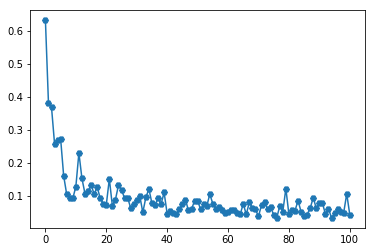

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(epoch_values, error_values, '-H');